## 1. problem statement

## Import requred Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import accuracy_score

## 2. Data Gathering

In [3]:
train = pd.read_csv("C:\\Users\\amol\\Desktop\\project\\loan predection\\train_ctrUa4K.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## 3. Exploratory Data Analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:>

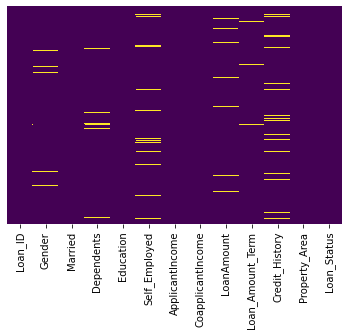

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
train.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [10]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
train.drop('Loan_ID',axis= 1, inplace = True)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 57.7+ KB


In [29]:
train['Gender'].unique()

array([1, 0], dtype=int64)

In [30]:
train['Gender'].replace({'Female':0,'Male':1},inplace = True)

In [31]:
train['Gender'].unique()

array([1, 0], dtype=int64)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 57.7+ KB


In [33]:
 train['Married'].unique()

array([0, 1], dtype=int64)

In [34]:
train['Married'].replace({'No':0,'Yes':1},inplace = True)

In [35]:
train['Married'].unique()

array([0, 1], dtype=int64)

In [36]:
train['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [37]:
train['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3},inplace = True)

In [38]:
train['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [40]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [41]:
train['Education'].replace({'Graduate':1,'Not Graduate':0},inplace = True)

In [42]:
train['Education'].unique()

array([1, 0], dtype=int64)

In [44]:
train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
train['Self_Employed'].replace({'Yes':1,'No':0},inplace = True)

In [47]:
train['Self_Employed'].unique()

array([0, 1], dtype=int64)

In [49]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [50]:
train['Property_Area'].replace({'Urban':0,'Rural':1,'Semiurban':2},inplace = True)

In [51]:
train['Property_Area'].unique()

array([0, 1, 2], dtype=int64)

In [55]:
train['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [54]:
train['Loan_Status'].replace({'Y':1,'N':0},inplace = True)

In [56]:
train['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [59]:
train.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.050489,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [60]:
train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.082045,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.003071,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,0.001781,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.073928,0.073658,0.003592,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,0.021996,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.007894,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,-0.028356,-0.059187
LoanAmount,0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,0.013799,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,0.086879,-0.022549
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.030248,0.540556


<AxesSubplot:>

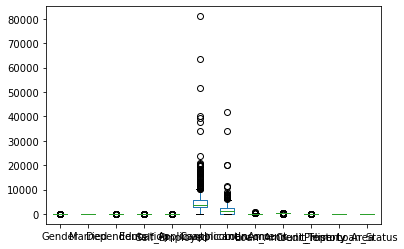

In [61]:
train.plot(kind='box')

## 4. Featuring Engineering

In [63]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

<AxesSubplot:>

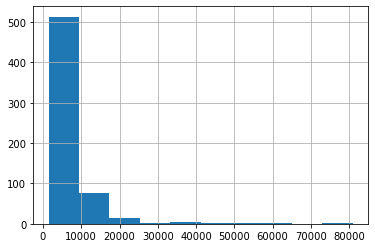

In [64]:
train.TotalIncome.hist()

In [65]:
train['log_TotalIncome'] = np.log(train['TotalIncome'])

<AxesSubplot:>

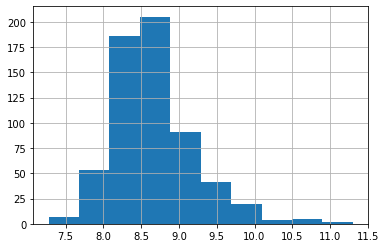

In [66]:
train['log_TotalIncome'].hist()

In [67]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'log_TotalIncome'],
      dtype='object')

<AxesSubplot:>

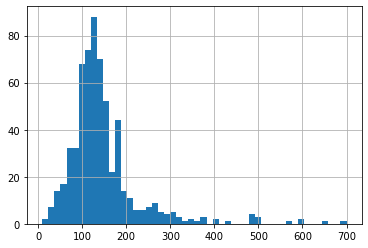

In [68]:
train.LoanAmount.hist(bins = 50)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,
         2.,  0.,  2.,  0.,  3.,  6.,  5.,  8.,  7.,  7., 17., 10., 19.,
        20., 50., 53., 58., 62., 48., 60., 36., 44., 16., 13., 10., 14.,
         8.,  7.,  3.,  6.,  2.,  1.,  4.,  3.,  1.,  2.,  2.]),
 array([2.19722458, 2.28430169, 2.37137881, 2.45845592, 2.54553304,
        2.63261015, 2.71968727, 2.80676438, 2.8938415 , 2.98091861,
        3.06799573, 3.15507284, 3.24214996, 3.32922707, 3.41630419,
        3.5033813 , 3.59045842, 3.67753553, 3.76461265, 3.85168977,
        3.93876688, 4.025844  , 4.11292111, 4.19999823, 4.28707534,
        4.37415246, 4.46122957, 4.54830669, 4.6353838 , 4.72246092,
        4.80953803, 4.89661515, 4.98369226, 5.07076938, 5.15784649,
        5.24492361, 5.33200072, 5.41907784, 5.50615495, 5.59323207,
        5.68030918, 5.7673863 , 5.85446341, 5.94154053, 6.02861764,
        6.11569476, 6.20277187, 6.28984899, 6.3769261 , 6.46400322,
        6.55108034]),
 <BarContainer

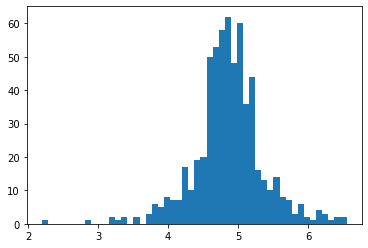

In [70]:
plt.hist(np.log(train.LoanAmount),bins =50)

In [72]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'log_TotalIncome'],
      dtype='object')

In [73]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,log_TotalIncome
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1,5849.0,8.674026
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0,6091.0,8.714568
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1,3000.0,8.006368
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1,4941.0,8.505323
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1,2900.0,7.972466
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,1,4106.0,8.320205
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1,8312.0,9.025456
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1,7583.0,8.933664


## 5. Feature Selection

In [74]:
train.drop(['ApplicantIncome','CoapplicantIncome','TotalIncome'], axis =1, inplace = True)

In [76]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'log_TotalIncome'],
      dtype='object')

## Loading And Preprocessing Test Dataset

In [78]:
test = pd.read_csv("C:\\Users\\amol\\Desktop\\project\\loan predection\\test_lAUu6dG.csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


<AxesSubplot:>

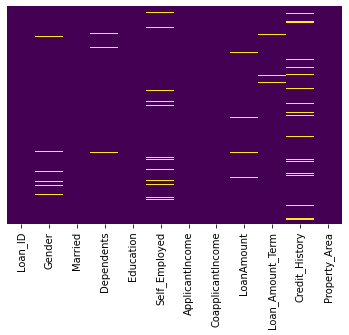

In [80]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [81]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [82]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [83]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [84]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [86]:
test.drop('Loan_ID',axis= 1, inplace = True)

In [87]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [88]:
test['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [89]:
test['Gender'].replace({'Female':0,'Male':1},inplace = True)

In [90]:
test['Gender'].unique()

array([1, 0], dtype=int64)

In [94]:
test['Married'].unique()

array([1, 0], dtype=int64)

In [93]:
test['Married'].replace({'No':0,'Yes':1},inplace = True)

In [95]:
test['Married'].unique()

array([1, 0], dtype=int64)

In [96]:
test['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [97]:
test['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3},inplace = True)

In [98]:
test['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [100]:
test['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [101]:
test['Education'].replace({'Graduate':1,'Not Graduate':0},inplace = True)

In [102]:
test['Education'].unique()

array([1, 0], dtype=int64)

In [103]:
test['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [104]:
test['Self_Employed'].replace({'Yes':1,'No':0},inplace = True)

In [105]:
test['Self_Employed'].unique()

array([0, 1], dtype=int64)

In [106]:
test['Property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [107]:
test['Property_Area'].replace({'Urban':0,'Rural':1,'Semiurban':2},inplace = True)

In [108]:
test['Property_Area'].unique()

array([0, 2, 1], dtype=int64)

In [111]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 31.7 KB


In [112]:
test.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.809264,0.634877,0.806540,0.771117,0.100817,4805.599455,1569.577657,136.132597,342.822888,0.839237,0.934605
std,0.393417,0.482122,1.065177,0.420687,0.301498,4910.685399,2334.232099,60.946040,64.658402,0.367814,0.833766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3786.000000,1025.000000,126.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,2.000000


In [113]:
test.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.265646,0.087744,-0.033377,0.070422,0.063556,0.082811,0.073402,-0.060836,0.032978,-0.054789
Married,0.265646,1.000000,0.362190,-0.049443,0.028374,0.051265,0.032548,0.181115,0.040692,0.037868,-0.032374
Dependents,0.087744,0.362190,1.000000,-0.129572,-0.024179,0.138004,-0.050024,0.133838,-0.053460,-0.051705,-0.029667
Education,-0.033377,-0.049443,-0.129572,1.000000,0.010096,0.136369,0.057318,0.155372,-0.064173,0.044072,-0.042790
Self_Employed,0.070422,0.028374,-0.024179,0.010096,1.000000,0.073010,-0.027065,0.077334,-0.026972,0.097277,-0.006308
ApplicantIncome,0.063556,0.051265,0.138004,0.136369,0.073010,1.000000,-0.110335,0.490174,0.023319,0.094944,-0.026435
CoapplicantIncome,0.082811,0.032548,-0.050024,0.057318,-0.027065,-0.110335,1.000000,0.150112,-0.008633,-0.058004,0.023456
LoanAmount,0.073402,0.181115,0.133838,0.155372,0.077334,0.490174,0.150112,1.000000,0.093476,-0.013201,-0.013486
Loan_Amount_Term,-0.060836,0.040692,-0.053460,-0.064173,-0.026972,0.023319,-0.008633,0.093476,1.000000,-0.048189,-0.021198
Credit_History,0.032978,0.037868,-0.051705,0.044072,0.097277,0.094944,-0.058004,-0.013201,-0.048189,1.000000,-0.061103


<AxesSubplot:>

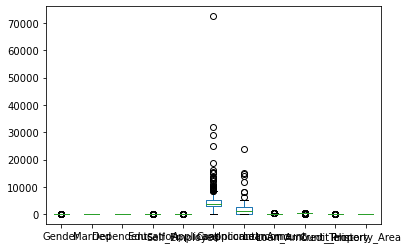

In [114]:
test.plot(kind='box')

In [115]:
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']

<AxesSubplot:>

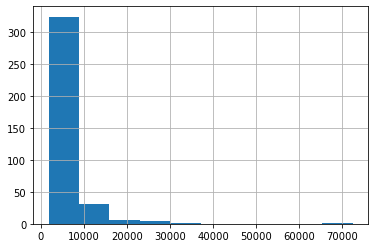

In [116]:
test.TotalIncome.hist()

In [117]:
test['log_TotalIncome'] = np.log(test['TotalIncome'])

<AxesSubplot:>

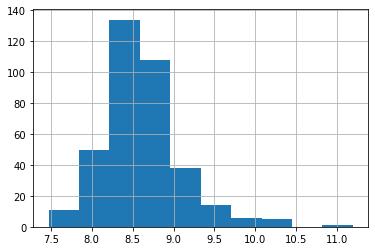

In [119]:
test['log_TotalIncome'].hist()

In [120]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome',
       'log_TotalIncome'],
      dtype='object')

<AxesSubplot:>

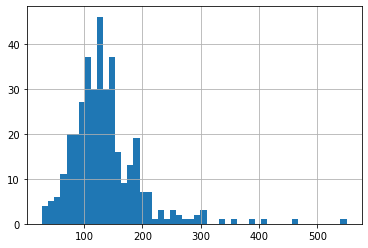

In [121]:
test.LoanAmount.hist(bins = 50)

(array([ 2.,  1.,  0.,  1.,  0.,  3.,  0.,  0.,  1.,  4.,  0.,  2.,  2.,
         3.,  7.,  6.,  5., 11.,  6., 15.,  9., 20., 32., 12., 30., 31.,
        27., 22., 23., 18., 11., 24.,  4., 10.,  3.,  3.,  1.,  5.,  2.,
         5.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([3.33220451, 3.39175879, 3.45131306, 3.51086734, 3.57042161,
        3.62997589, 3.68953016, 3.74908444, 3.80863871, 3.86819299,
        3.92774726, 3.98730154, 4.04685581, 4.10641009, 4.16596437,
        4.22551864, 4.28507292, 4.34462719, 4.40418147, 4.46373574,
        4.52329002, 4.58284429, 4.64239857, 4.70195284, 4.76150712,
        4.82106139, 4.88061567, 4.94016994, 4.99972422, 5.0592785 ,
        5.11883277, 5.17838705, 5.23794132, 5.2974956 , 5.35704987,
        5.41660415, 5.47615842, 5.5357127 , 5.59526697, 5.65482125,
        5.71437552, 5.7739298 , 5.83348408, 5.89303835, 5.95259263,
        6.0121469 , 6.07170118, 6.13125545, 6.19080973, 6.250364  ,
        6.30991828]),
 <BarContainer

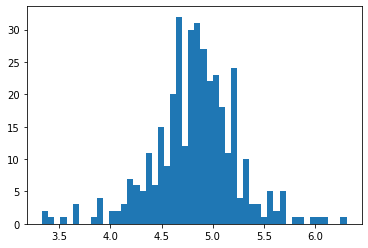

In [122]:
plt.hist(np.log(test.LoanAmount),bins =50)

In [123]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome',
       'log_TotalIncome'],
      dtype='object')

In [126]:
test.drop(['ApplicantIncome','CoapplicantIncome','TotalIncome'], axis =1, inplace = True)

In [128]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'log_TotalIncome'],
      dtype='object')

In [127]:
test

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,log_TotalIncome
0,1,1,0,1,0,110.0,360.0,1.0,0,8.651724
1,1,1,1,1,0,126.0,360.0,1.0,0,8.428581
2,1,1,2,1,0,208.0,360.0,1.0,0,8.824678
3,1,1,2,1,0,100.0,360.0,1.0,0,8.494129
4,1,0,0,0,0,78.0,360.0,1.0,0,8.094378
...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,113.0,360.0,1.0,0,8.663196
363,1,1,0,1,0,115.0,360.0,1.0,0,8.490233
364,1,0,0,1,0,126.0,360.0,1.0,2,8.564649
365,1,1,0,1,0,158.0,360.0,1.0,1,8.908289


## Model Building

In [77]:
x = train.drop(columns = ['Loan_Status'])
y = train['Loan_Status']

In [129]:
model = LogisticRegression()
model.fit(x,y)

C:\Users\amol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [130]:
y_pred = model.predict(test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [134]:
sample = pd.read_csv("C:\\Users\\amol\\Desktop\\project\\loan predection\\test_lAUu6dG.csv")
sample

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [135]:
sample.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [136]:
sample.drop(['Gender', 'Married','Dependents',
       'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History','Property_Area'
       ], axis='columns', inplace=True)

sample["Loan_Status"] = y_pred

In [137]:
sample

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [138]:
sample['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [141]:
sample['Loan_Status'].replace({1:'Y',0:'N'},inplace = True)

In [142]:
sample['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [143]:
sample.to_csv('samplelogisticR.csv', index = False)